In [50]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import pickle as pkl

In [51]:
#import image
#type type of data set and shape

hs_img= np.load("C:/Users/user/Documents/Grad School/Computer Coding/data for project/hs_houston.npy")
print(type(hs_img))
print("NUMBER OF BANDS BY PIXEL")
print("Size of the image is", hs_img.shape)

#results 144 channels, number of pixels 

<class 'numpy.ndarray'>
NUMBER OF BANDS BY PIXEL
Size of the image is (144, 664845)


New shape (349, 1905, 144)


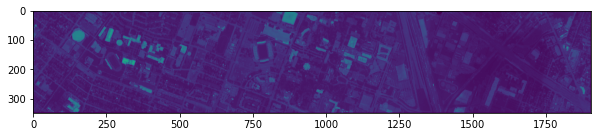

In [52]:
#349 rows, 1905 columns, 144 channels
#reshape image
#format b x nxm
hs_cube= np.reshape(hs_img.T,(349,1905,144))
print("New shape",hs_cube.shape)

plt.figure(figsize= (10,10))
plt.imshow(hs_cube[:,:,10])




(1905, 349)
(1905, 349)
(1905, 349)
(1905, 349)


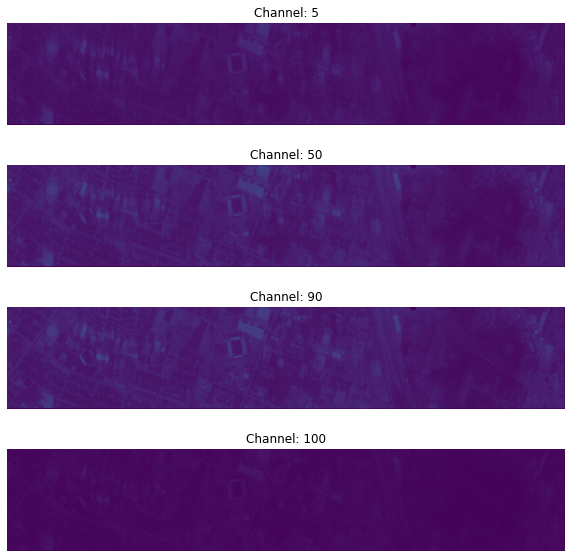

In [53]:
#print different channels
channels= (5,50,90,100)
_, fig = plt.subplots(nrows=4, ncols=1, figsize= (10,10))
for ax, image, channel in zip(fig, hs_cube.T[:,:,:],channels):
    print(image.shape)
    ax.set_axis_off()
    ax.imshow(image.T)
    ax.set_title("Channel: %i" % channel)

   

In [54]:
#load train, testing, data and labels
#train and test data
#classifying with the whole channel the use PCA to see preformance
#output map, reshap output map

In [55]:
train_nsample_perclass= np.load("C:/Users/user/Documents/Grad School/Computer Coding/data for project/train_number_sample_perclass.npy")
test_nsample_perclass= np.load("C:/Users/user/Documents/Grad School/Computer Coding/data for project/test_number_sample_perclass.npy")

train_class_label= np.load("C:/Users/user/Documents/Grad School/Computer Coding/data for project/train_classes_label.npy")
test_class_label=np.load("C:/Users/user/Documents/Grad School/Computer Coding/data for project/test_classes_label.npy")

size_test=np.load("C:/Users/user/Documents/Grad School/Computer Coding/data for project/size_test.npy")
size_train = np.load("C:/Users/user/Documents/Grad School/Computer Coding/data for project/size_train.npy")

print("number of pixel for training", size_train)
print("number of pixels for testing", size_test)

#how many pixels per class nsample
print("Size of the pixel per class is", train_nsample_perclass.shape)
print(type(train_nsample_perclass))

#number of samples per class
print("NUMBER OF SAMPLES IN THE TESTING SET")
for index in range(len(test_nsample_perclass)):
    print("class # is {0:d}, number of samples is {1:d}".format(index,test_nsample_perclass[index]))

print("NUMBER OF SAMPLES IN THE TRAINING SET")
for index in range(len(test_nsample_perclass)):
    print("class # is {0:d}, number of samples is {1:d}".format(index,train_nsample_perclass[index]))


number of pixel for training 2832
number of pixels for testing 12002
Size of the pixel per class is (15,)
<class 'numpy.ndarray'>
NUMBER OF SAMPLES IN THE TESTING SET
class # is 0, number of samples is 1045
class # is 1, number of samples is 1034
class # is 2, number of samples is 502
class # is 3, number of samples is 1053
class # is 4, number of samples is 1057
class # is 5, number of samples is 143
class # is 6, number of samples is 1018
class # is 7, number of samples is 1042
class # is 8, number of samples is 1033
class # is 9, number of samples is 1034
class # is 10, number of samples is 1023
class # is 11, number of samples is 1031
class # is 12, number of samples is 269
class # is 13, number of samples is 246
class # is 14, number of samples is 472
NUMBER OF SAMPLES IN THE TRAINING SET
class # is 0, number of samples is 198
class # is 1, number of samples is 190
class # is 2, number of samples is 192
class # is 3, number of samples is 188
class # is 4, number of samples is 186


In [56]:
#load pickle files 


with open("C:/Users/user/Documents/Grad School/Computer Coding/data for project/train_classes_pixels.pkl", "rb") as f:
    train_class_pixels = pkl.load(f)

with open("C:/Users/user/Documents/Grad School/Computer Coding/data for project/test_classes_pixels.pkl", "rb") as f:
    test_class_pixels = pkl.load(f)


In [57]:
#printing number of class and size


In [58]:
#print all channels for one pixel

print("PRINTING ALL THE BANDS IN THE 1ST PIXEL OF THE 0 CLASS")
print(hs_img[:,test_class_pixels[0][0]])



PRINTING ALL THE BANDS IN THE 1ST PIXEL OF THE 0 CLASS
[  405   531   685   813   900   961  1189  1271  1687  1966  2127  2313
  2405  2473  2374  2534  2720  2949  3154  3239  3277  3379  3354  3285
  3271  3290  3136  3258  3304  3204  3320  3442  3489  3624  4026  4311
  4546  4571  4517  4640  4668  4606  4473  4335  4119  3956  3886  3673
  3347  3376  3422  3485  3326  3181  3100  3024  2947  2938  2860  2745
  2566  2477  2407  2464  2410  2357  2343  2359  1546  2397  2841  3376
  4167  5066  5429  5318  6277  7420  9694 11473 12939 13871 14268 12528
  8792 12526 14723 14940 14877 14482 13857 13743 13560 13661 12766 10334
 10218 10591 11032 11751 12765 13202 13144 12741 13149 13231 12938 13223
 13197 13130 12917 11948  9327  8050  8440  7261  6783  7684  7186  4191
  1949  2225  2249  2295  2518  3058  4013  5815  6816  6896  8140  9379
  9976 10540 10411 10215 10443 10550 10434 10580 10665 10526 10673 10890]


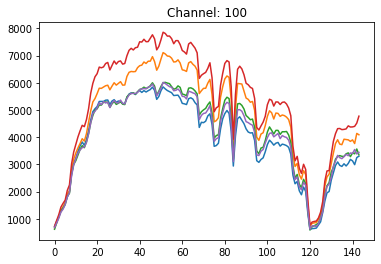

In [68]:
#plotting all spectral signature of training and testing pixels
#try to plot in differnt plots

pixels = (1,2,3,4,5)
class_pixels = 0
bands = 144
fig,ax = plt.subplots() #create figure and axes
for pixels_index in range(0,len(pixels)):
    ax.plot(range(0,bands), hs_img[:,test_class_pixels[10][pixels[pixels_index]]])
    ax.set_title("Channel: %i" % channel)


In [72]:
#saving bands, per pixel of each index in each class

nclass= 15
x_train= []
for i in range(0,nclass):
    for j in range (train_nsample_perclass[i]):
        x_train.append(hs_img[:,train_class_pixels[i][j]])
x_train=np.array(x_train)

x_test= []
for i in range(0,nclass):
    for j in range (test_nsample_perclass[i]):
        x_test.append(hs_img[:,test_class_pixels[i][j]])
x_test=np.array(x_test)

In [ ]:
#do matrix and conustion matrix